In [2]:
from google.colab import files
uploded=files.upload()

Saving advertising.csv to advertising.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated().any()

False

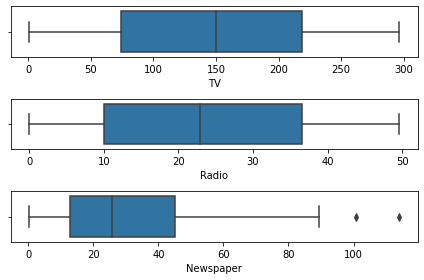

In [16]:
fig,axs=plt.subplots(nrows=3)
plot1=sns.boxplot(x=df['TV'],ax=axs[0])
plot2=sns.boxplot(x=df['Radio'],ax=axs[1])
plot3=sns.boxplot(x=df['Newspaper'],ax=axs[2])
plt.tight_layout()

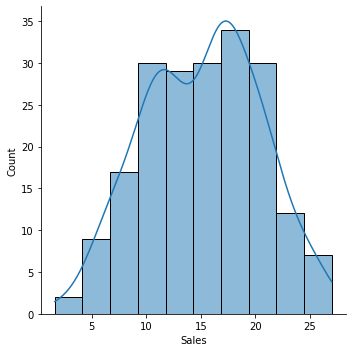

In [24]:
sns.displot(df['Sales'],kde=True)

In [26]:
corr=df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


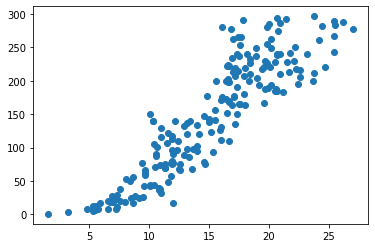

In [37]:
plot1=plt.scatter(df['Sales'],df['TV'])


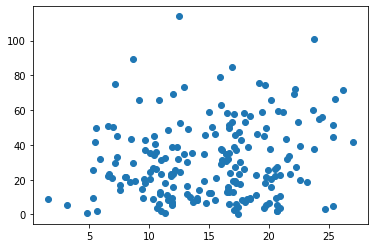

In [38]:
plot1=plt.scatter(df['Sales'],df['Newspaper'])

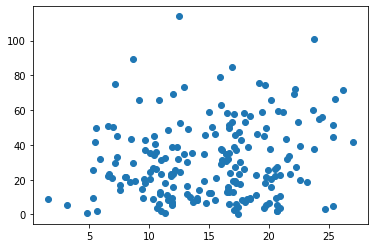

In [39]:
plot1=plt.scatter(df['Sales'],df['Newspaper'])

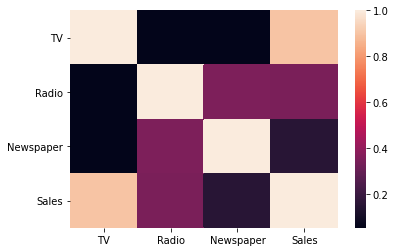

In [41]:
sns.heatmap(corr)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [62]:
mlr=LinearRegression();
result=mlr.fit(x_train,y_train)

In [63]:
y_test_pred=mlr.predict(x_test)

In [64]:
ans=pd.DataFrame({'Actual':y_test,'Pred':y_test_pred})
ans.head()

,Actual,Pred
157,10.1,12.948238
136,9.5,10.317131
151,11.6,12.359023
9,15.6,15.699231
165,16.9,18.059538


In [67]:
ans['residuals']=ans['Actual']-ans['Pred']
ans['residuals']

157   -2.848238
136   -0.817131
151   -0.759023
9     -0.099231
165   -1.159538
68    -1.362120
6      0.363191
56    -2.916932
26    -0.486490
121   -1.403990
132   -2.402825
64    -0.418054
153   -2.267441
124   -1.101534
108   -0.359465
5     -3.743461
159   -0.989384
170   -0.346533
156    0.615441
105   -2.371466
89     0.713176
93    -0.163233
53     1.496952
87     0.650157
184   -2.998914
185    2.108784
97     3.619243
54    -1.568015
8     -0.630701
37     0.431946
180    2.167390
78    -2.983807
22    -1.885223
72    -1.011192
112    1.438461
27     1.562981
65     1.920537
155   -3.039069
13     2.955928
187   -0.701297
161   -0.123516
195    0.349379
99     0.563715
168   -1.914871
12    -1.004377
90     1.590118
154    3.643633
110    0.486131
52     1.729988
104   -0.288899
29     0.041854
18     0.594142
138   -0.316462
101   -1.140032
83     0.257026
47     1.261474
28    -2.003714
140    0.383809
103    3.094968
175    2.159797
Name: residuals, dtype: float64

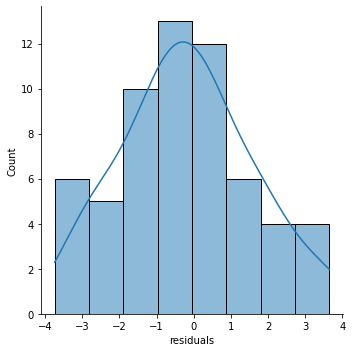

In [70]:
sns.displot(ans['residuals'],kde=True)

residuals are normally destributed  

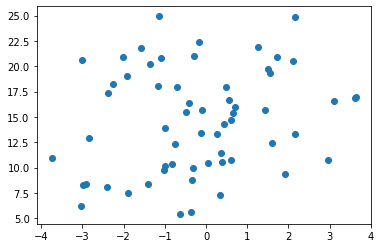

In [71]:
plt.scatter(ans['residuals'],ans['Pred'])

since its not like a funnel or cone we san say its homoscedastic.
Both the assumptions for multiple regression are not violated,
ie data should be hetroscedastic and no or less multicolinearity.

In [75]:
from sklearn import metrics;
mse=metrics.mean_squared_error(y_test,y_test_pred)
mae=metrics.mean_absolute_error(y_test,y_test_pred)


In [77]:
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)

Mean Absolute Error:  1.3971066716658311
Mean Squared Error:  3.010856069995055
